<a href="https://colab.research.google.com/github/brittanyasare04/knn_assignment/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. The difference between regression and classification is that regression predicts continuous numerical values while classification predicts discrete categories/labels
2. A confusion table sums up how many predictions a classification model got correct vs. incorrect
3. The Sum of Squared Errors measures how far predictions are from actual values in regression as well as capturing total prediction error across all data points.
4. Overfitting is when the model becomes too complex and memorizes training data. It performs poorly to new data. Underfitting is when the model is too simple that it fails to capture patterns and tends to perform poorly with both training and test data.
5. Splitting the data ensures that the model is trained on one set and evaluated on the unseen data. Choosing k based on test accuracy ensures the model is generalized well.
6. Some strengths of the class labeling is that it is simple, easy to interpret, and useful when you need to make a final conclusion. Some weakness consists of it having no confidence information and its hard to distinguish between barely certain and highly certain. Some strengths of probability distributions is that it gives confidence levels which is useful for risk-based decisions. Some weaknesses are that it is more complex and can be misleading if probabilities aren't accurate.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [6]:
!git clone https://github.com/ds3001f25/knn_assignment.git

Cloning into 'knn_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 854.33 KiB | 12.56 MiB/s, done.


In [4]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# Loading in the airbnb data sets
airbnb = pd.read_csv('/content/knn_assignment/data/airbnb_hw.csv')

In [8]:
# Using .loc, reduce dataframe to the variables price, review scores rating, and beds
df = airbnb.loc[:, ['Price', 'Review Scores Rating', 'Beds']]

In [9]:
# Using .isnull() to select subset dataframe with missing values
df_missing = df[df['Review Scores Rating'].isnull()]

In [10]:
# Drop rows with missing values from the dataframe
df = df.dropna(axis = 0, how = 'any')
display(df.head())
display(df.shape)

,Price,Review Scores Rating,Beds
4,549,96.0,3.0
5,149,100.0,1.0
6,250,100.0,1.0
7,90,94.0,1.0
8,270,90.0,2.0


(22111, 3)

**Reasoning**:
Separate the features and the target variable from the complete cases dataframe.



In [11]:
X = df[['Price', 'Beds']]
y = df['Review Scores Rating']
display(X.head())
display(y.head())

,Price,Beds
4,549,3.0
5,149,1.0
6,250,1.0
7,90,1.0
8,270,2.0


,Review Scores Rating
4,96.0
5,100.0
6,100.0
7,94.0
8,90.0


In [13]:
# Creating a k-NN model that uses variables Price and Beds to predict Review Scores Rating
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd # Import pandas as it's needed for dataframe operations

# Recreate df by loading, selecting columns, and dropping NA (from previous cells)
airbnb = pd.read_csv('/content/knn_assignment/data/airbnb_hw.csv')
df = airbnb.loc[:, ['Price', 'Review Scores Rating', 'Beds']]
df = df.dropna(axis = 0, how = 'any')

# Clean the 'Price' column: remove commas and convert to numeric
df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Use errors='coerce' to handle any other non-numeric issues

# Drop rows where Price might have become NaN after coercion
df.dropna(subset=['Price'], inplace=True)

# Define features and target (added from cell f4dc0d14)
X = df[['Price', 'Beds']]
y = df['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# Recreate df_missing by loading, selecting columns, and isolating missing values (from previous cells)
airbnb = pd.read_csv('/content/knn_assignment/data/airbnb_hw.csv')
df_temp = airbnb.loc[:, ['Price', 'Review Scores Rating', 'Beds']]
df_missing = df_temp[df_temp['Review Scores Rating'].isnull()].copy() # Use .copy() to avoid SettingWithCopyWarning

# Prepare the missing data for prediction
# Ensure 'Price' and 'Beds' columns are numeric in df_missing
df_missing['Price'] = df_missing['Price'].astype(str).str.replace(',', '', regex=False)
df_missing['Price'] = pd.to_numeric(df_missing['Price'], errors='coerce') # Use errors='coerce' to handle non-numeric
df_missing['Beds'] = pd.to_numeric(df_missing['Beds'], errors='coerce') # Ensure 'Beds' is numeric

# Select features for prediction from the missing dataframe and drop any rows with NaN in features
X_missing = df_missing[['Price', 'Beds']].dropna()


# Define features and target from the *complete* cases for training (recreating df)
df = df_temp.dropna(axis = 0, how = 'any').copy() # Recreate df with complete cases, use .copy()
df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True) # Drop rows where Price became NaN after coercion

X_train = df[['Price', 'Beds']]
y_train = df['Review Scores Rating']

# Ensure X_train and X_missing have the same columns and order
X_train = X_train[['Price', 'Beds']]
X_missing = X_missing[['Price', 'Beds']]

# Recreate mse_values and k_values and find optimal_k (from previous cells)
from sklearn.model_selection import train_test_split # Ensure import is here
from sklearn.metrics import mean_squared_error # Ensure import is here

X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # Use different variable names to avoid conflict

mse_values = []
k_values = [3, 5, 10, 15, 20] # Assuming these are the k values used previously

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_opt, y_train_opt)
    y_pred_opt = knn_model.predict(X_test_opt)
    mse = mean_squared_error(y_test_opt, y_pred_opt)
    mse_values.append(mse)

optimal_k_index = mse_values.index(min(mse_values))
optimal_k = k_values[optimal_k_index]

# Initialize and train the k-NN model with the optimal k on the complete training data
from sklearn.neighbors import KNeighborsRegressor # Ensure import is here if not run elsewhere
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train) # Train on the full training data X_train, y_train

# Predict the missing ratings
predicted_ratings = knn_optimal.predict(X_missing)

# Add the predicted ratings back to the original df_missing dataframe (aligning by index)
df_missing['Predicted Review Scores Rating'] = pd.Series(predicted_ratings, index=X_missing.index)


display(df_missing.head())

,Price,Review Scores Rating,Beds,Predicted Review Scores Rating
0,145,NaN,1.0,94.50
1,37,NaN,1.0,90.40
2,28,NaN,1.0,90.55
3,199,NaN,3.0,88.50
13,68,NaN,1.0,89.90


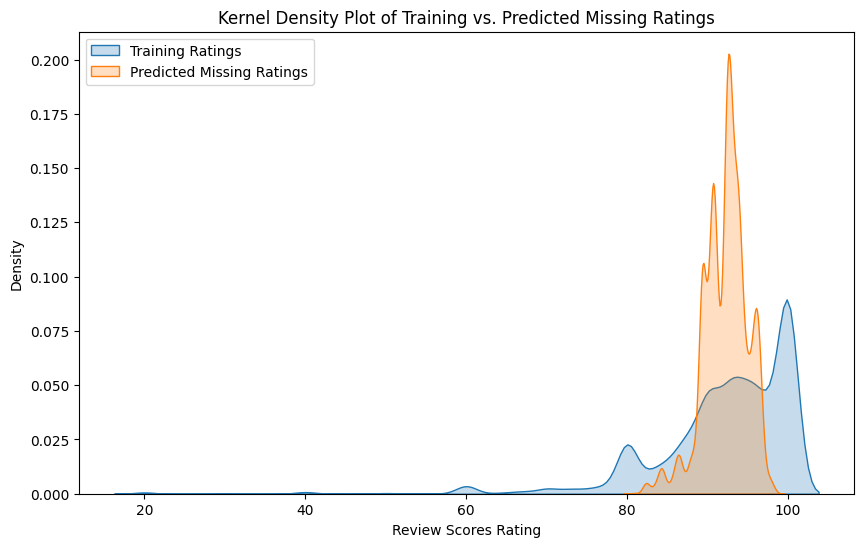

In [17]:
# Create a kernel density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(y_train, label='Training Ratings', fill=True)
sns.kdeplot(df_missing['Predicted Review Scores Rating'].dropna(), label='Predicted Missing Ratings', fill=True)
plt.title('Kernel Density Plot of Training vs. Predicted Missing Ratings')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

The two ratings do not look similar. This is due to kNN method predicting a missing value based on the average of its kNN in the training data. This will tend to smooth out the data predictions. Making the distribution of the predicted missing ratings tends to be narrower and more clustered around the mean compared to tthe original training ratings.